pytesseract ek Python library hai jo Tesseract OCR engine ko Python ke andar use karne deta hai.
*	Tesseract = actual OCR software (image → text)
*	pytesseract = us Tesseract ko Python se call karne ka bridge

# Simple text extraction

In [ ]:
import pytesseract
from PIL import Image
import cv2
import matplotlib.pyplot as plt
# pytesseract.pytesseract.tesseract_cmd = '/usr/local/bin/tesseract' for windows
# macos apne aap detect kar lega tesseract ko agar install hai to
# Method 1 using PIL
# load image
img = Image.open('/Users/karansingh/ocr-learning/pytesseract/text_image.jpg')

# extract text
text = pytesseract.image_to_string(img)
print(text)
print("="*50) # separator line

## Using OpenCV
img_cv = cv2.imread('/Users/karansingh/ocr-learning/pytesseract/text_image.jpg')
# Convert BGR to RGB (Tesseract expects RGB)
img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
# extract text
text2 = pytesseract.image_to_string(img_rgb)
print(text2)

Hello World!

This is a sample text image.
Tesseract OCR can read this.
Python + OpenCV + PyTesseract

Hello World!

This is a sample text image.
Tesseract OCR can read this.
Python + OpenCV + PyTesseract



# 3. Preprocessing for Better Accuracy
Image ko step-by-step clean karke pytesseract ko better input dena,
phir compare karna ki OCR pehle aur baad me kaisa output deta hai.


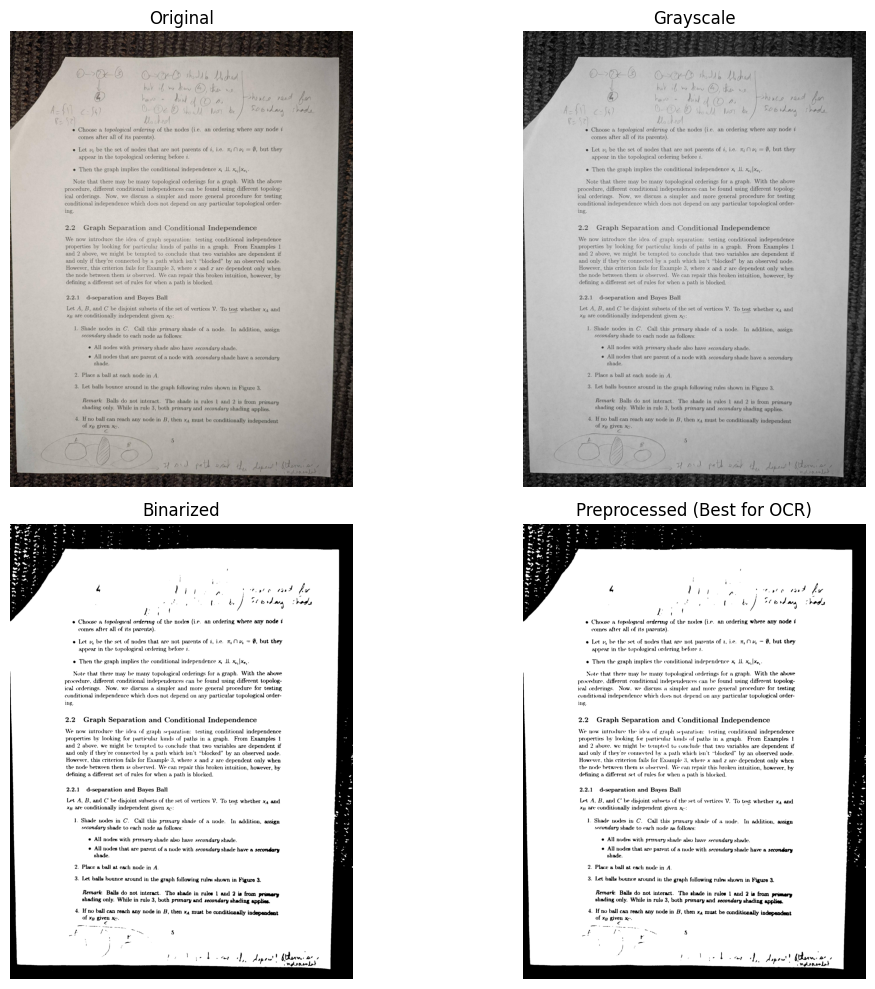

WITHOUT PREPROCESSING:
e Choose a topological ordering of the nodes (i.e. an ordering where any node 7
comes after all of its parents).

e Let v; be the set of nodes that are not parents of 7, i.e. 714 = 0, but they
appear in the topological ordering before 2.

e Then the graph implies the conditional independence x; IL %,|x,,.

Note that there may be many topological orderings for a graph. With the above
procedure, different conditional independences can be found using different topolog-
ical orderings. Now, we discuss a simpler and more general procedure for testing
conditional independence which does not depend on any particular topological order-
ing.

2.2. Graph Separation and Conditional Independence

We now introduce the idea of graph separation: testing conditional independence
properties by looking for particular kinds of paths in a graph. From Examples 1
and 2 above, we might be tempted to conclude that two variables are dependent if
and only if they’re connected by a path wh

In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np

def preprocess_for_ocr(image_path):
    """
    Preprocess image for better OCR accuracy
    """
    # Read image
    img = cv2.imread(image_path)
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 1. Noise removal
    denoised = cv2.bilateralFilter(gray, 9, 75, 75) # (d, sigmaColor, sigmaSpace)
    
    # 2. Contrast enhancement (CLAHE)
    # Contrast enhance the image using CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    contrast = clahe.apply(denoised)
    
    # 3. Binarization (Otsu's method)
    #Image ko sirf black & white me convert karta hai.
    _, binary = cv2.threshold(contrast, 0, 255, 
                              cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # 4. Morphological operations (remove small noise)
    # 	•	chhote gaps fill karta hai
	#   •	broken letters ko join karta hai
    kernel = np.ones((2, 2), np.uint8)
    morph = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    
    return img, gray, binary, morph

# Test
image_path = '/Users/karansingh/ocr-learning/pytesseract/vlrYO.jpg'
original, gray, binary, preprocessed = preprocess_for_ocr(image_path)

# Compare OCR results
text_original = pytesseract.image_to_string(gray)
text_preprocessed = pytesseract.image_to_string(preprocessed)

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original')
axes[0, 0]. axis('off')

axes[0, 1].imshow(gray, cmap='gray')
axes[0, 1].set_title('Grayscale')
axes[0, 1].axis('off')

axes[1, 0].imshow(binary, cmap='gray')
axes[1, 0].set_title('Binarized')
axes[1, 0].axis('off')

axes[1, 1]. imshow(preprocessed, cmap='gray')
axes[1, 1].set_title('Preprocessed (Best for OCR)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Print comparison
print("WITHOUT PREPROCESSING:")
print(text_original)
print("\n" + "="*50 + "\n")
print("WITH PREPROCESSING:")
print(text_preprocessed)

“Because OCR engines perform better on high-contrast, noise-free, binarized images.
I use bilateral filtering, CLAHE, Otsu thresholding and morphological operations to improve character clarity before passing the image to Tesseract.”
